In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('titanic_data.csv')

# preprocessing

In [37]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [39]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
# drop columns
rm = ['PassengerId','Name',  'Ticket', 'Fare', 'Cabin']
data.drop(rm,axis=1,inplace=True)

In [41]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [51]:
m = data['Age'].mean()

In [52]:
data['Age'] = data['Age'].fillna(m)

In [87]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [88]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [89]:
data['Embarked'] = data['Embarked'].fillna('S')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


# EDA

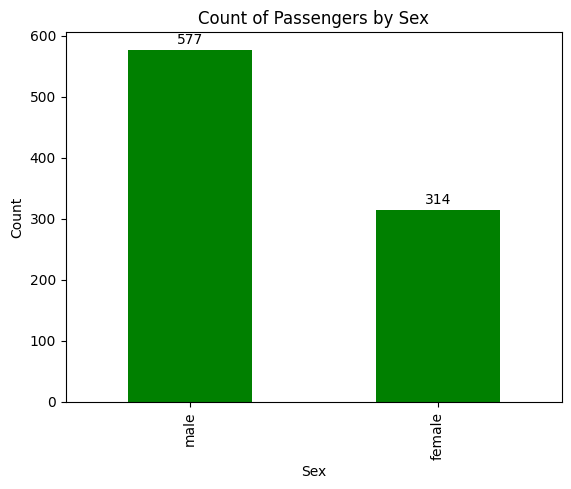

In [83]:
sex_counts = data['Sex'].value_counts()

ax = sex_counts.plot(kind='bar', color='g')

for i, count in enumerate(sex_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Passengers by Sex')

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11816\3861314884.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


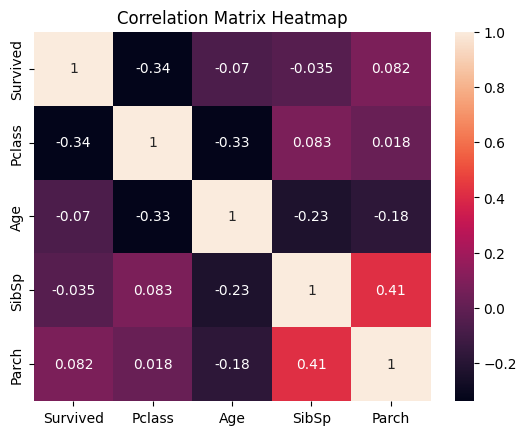

In [104]:
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

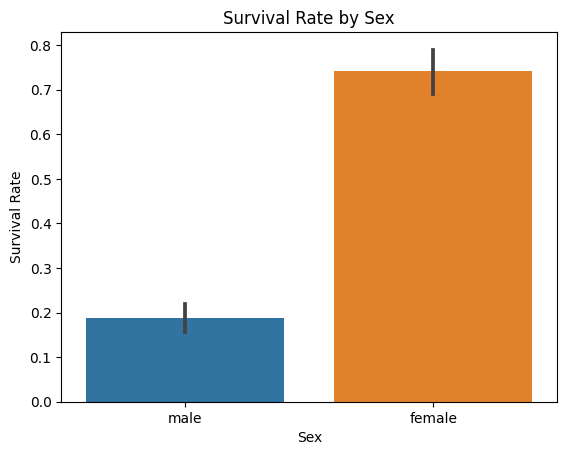

In [78]:
sns.barplot(x='Sex' ,y='Survived', data=data)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')

plt.show()

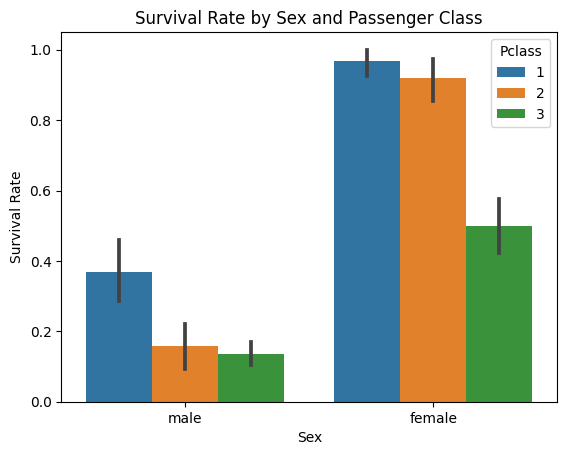

In [77]:
sns.barplot(x='Sex' ,y='Survived',hue='Pclass', data=data)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex and Passenger Class')

plt.show()

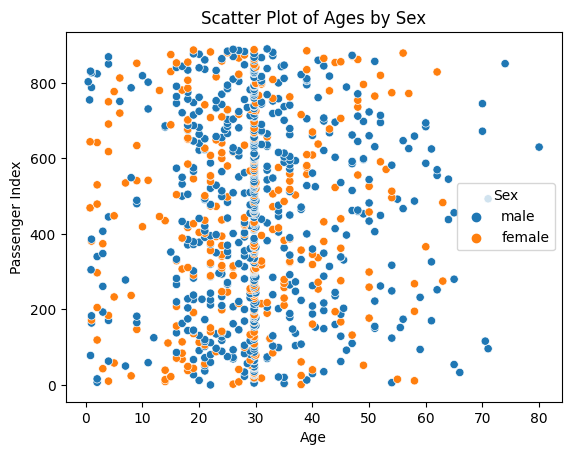

In [66]:
sns.scatterplot(x=data['Age'], y=data.index, hue=data['Sex'])
plt.xlabel('Age')
plt.ylabel('Passenger Index')
plt.title('Scatter Plot of Ages by Sex')
plt.show()

In [69]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

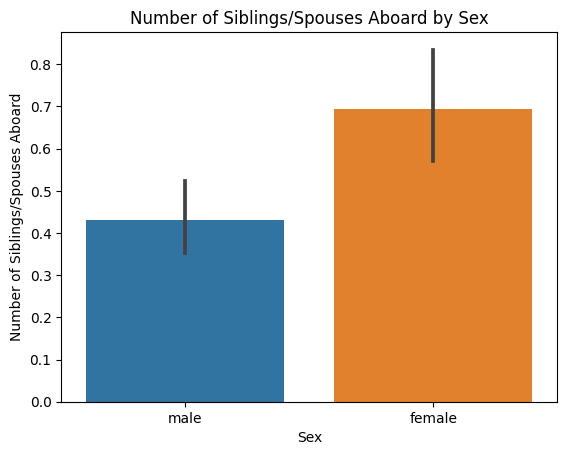

In [76]:
sns.barplot(x='Sex',y='SibSp' , data=data)
plt.ylabel('Number of Siblings/Spouses Aboard')
plt.xlabel('Sex')
plt.title('Number of Siblings/Spouses Aboard by Sex')
plt.show()


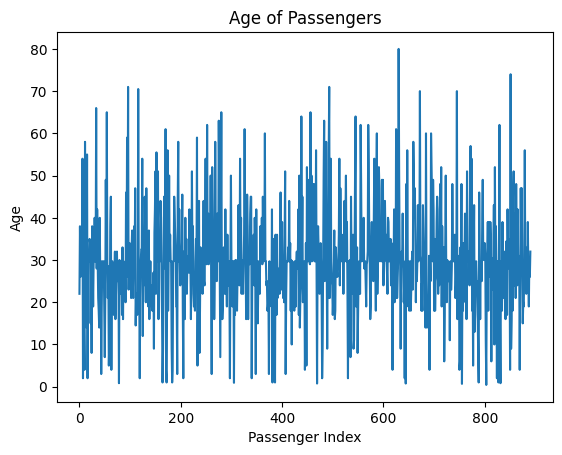

In [82]:

plt.plot(data['Age'])
plt.xlabel('Passenger Index')
plt.ylabel('Age')
plt.title('Age of Passengers')

plt.show()

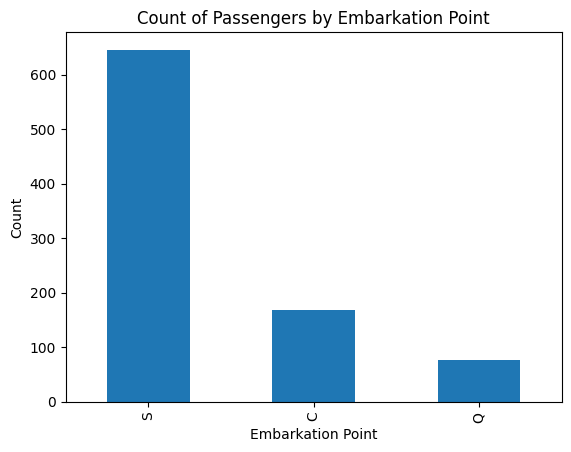

In [98]:
embarked_counts = data['Embarked'].value_counts()

embarked_counts.plot(kind='bar')

plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.title('Count of Passengers by Embarkation Point')

plt.show()

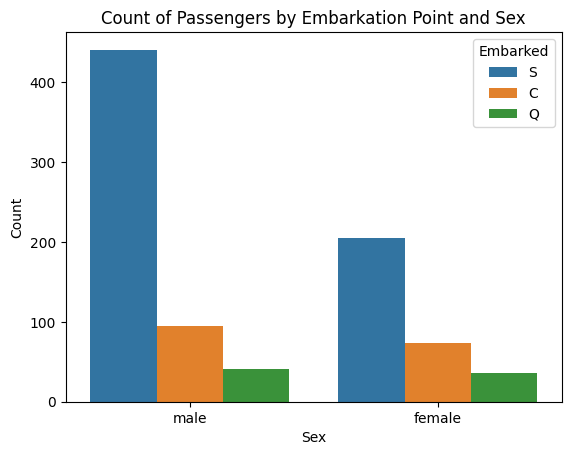

In [103]:
sns.countplot(x='Sex', hue='Embarked', data=data)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Passengers by Embarkation Point and Sex')

plt.show()